In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/iris-dataset/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [6]:
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [10]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


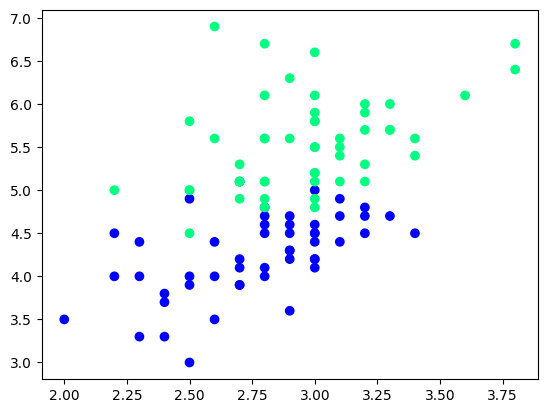

In [11]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [12]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [13]:
df_train

,sepal_width,petal_length,species
108,2.5,5.8,2
140,3.1,5.6,2
91,3.0,4.6,1
127,3.0,4.9,2
100,3.3,6.0,2
121,2.8,4.9,2
103,2.9,5.6,2
76,2.8,4.8,1
96,2.9,4.2,1
131,3.8,6.4,2


In [14]:
df_val

,sepal_width,petal_length,species
120,3.2,5.7,2
99,2.8,4.1,1
132,2.8,5.6,2
135,3.0,6.1,2
129,3.0,5.8,2


In [15]:
df_test

,sepal_width,petal_length,species
58,2.9,4.6,1
67,2.7,4.1,1
148,3.4,5.4,2
63,2.9,4.7,1
90,2.6,4.4,1


In [16]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [17]:
X_test

array([[3.2, 5.7],
       [2.8, 4.1],
       [2.8, 5.6],
       [3. , 6.1],
       [3. , 5.8]])

In [18]:
y_test

array([2, 1, 2, 2, 2])

# ***Case 1 - Bagging***

In [19]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
103,2.9,5.6,2
121,2.8,4.9,2
91,3.0,4.6,1
100,3.3,6.0,2
131,3.8,6.4,2
91,3.0,4.6,1
121,2.8,4.9,2
103,2.9,5.6,2


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [21]:
dt_bag1 = DecisionTreeClassifier()

In [22]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

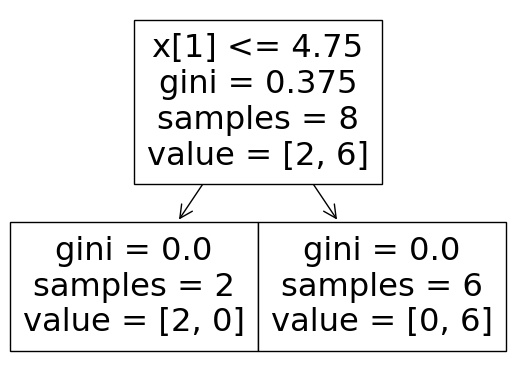

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


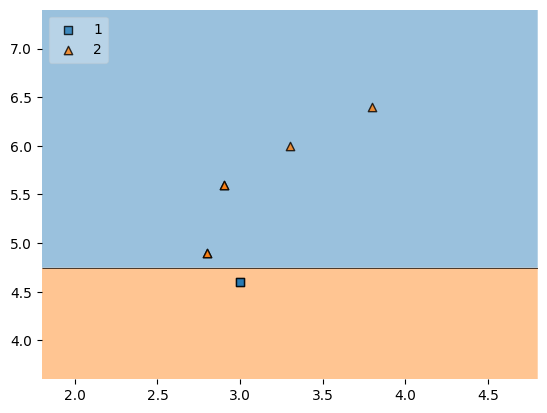

In [23]:
evaluate(dt_bag1,X,y)

In [24]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
96,2.9,4.2,1
103,2.9,5.6,2
108,2.5,5.8,2
91,3.0,4.6,1
121,2.8,4.9,2
103,2.9,5.6,2
100,3.3,6.0,2
76,2.8,4.8,1


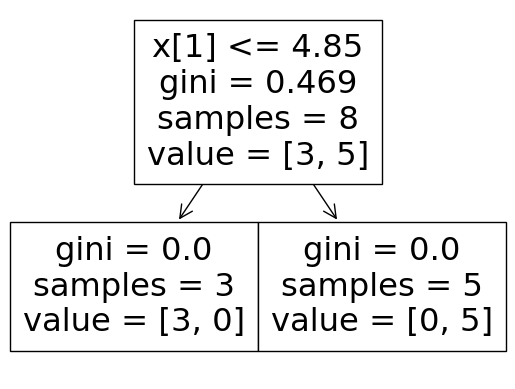

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


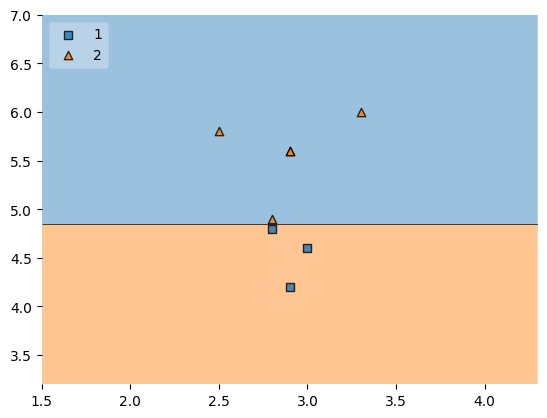

In [25]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [26]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
127,3.0,4.9,2
96,2.9,4.2,1
131,3.8,6.4,2
91,3.0,4.6,1
96,2.9,4.2,1
100,3.3,6.0,2
100,3.3,6.0,2
121,2.8,4.9,2


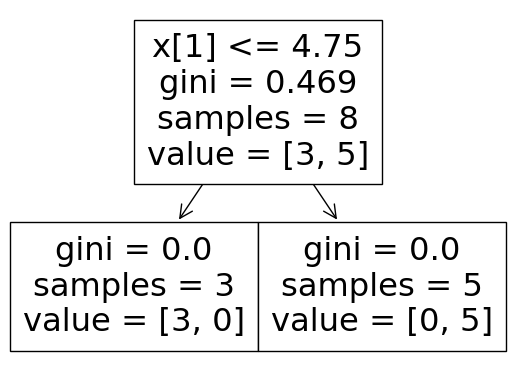

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


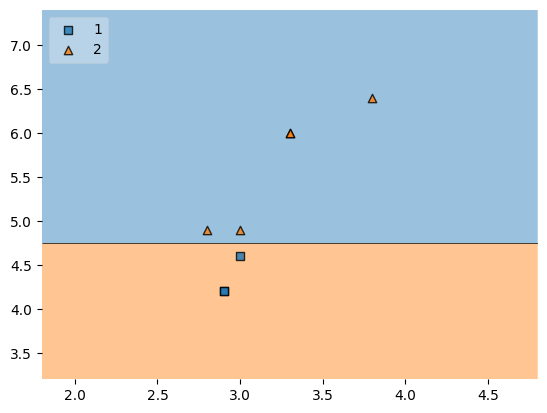

In [27]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# ***Predict***

In [28]:
df_test

,sepal_width,petal_length,species
58,2.9,4.6,1
67,2.7,4.1,1
148,3.4,5.4,2
63,2.9,4.7,1
90,2.6,4.4,1


In [29]:
print("Predictor 1",dt_bag1.predict(np.array([2.6,5.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.6,5.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.6,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# ***Pasting***

In [30]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
108,2.5,5.8,2
140,3.1,5.6,2
91,3.0,4.6,1
127,3.0,4.9,2
100,3.3,6.0,2
121,2.8,4.9,2
103,2.9,5.6,2
76,2.8,4.8,1
96,2.9,4.2,1
131,3.8,6.4,2


In [31]:
df_train.sample(8)

,sepal_width,petal_length,species
121,2.8,4.9,2
76,2.8,4.8,1
108,2.5,5.8,2
100,3.3,6.0,2
96,2.9,4.2,1
131,3.8,6.4,2
103,2.9,5.6,2
91,3.0,4.6,1


# ***Random Subspaces - Column Sampling***

In [32]:
df1=pd.read_csv('/kaggle/input/iris-dataset/iris.csv')

In [33]:
df1 = df1.sample(10)

In [34]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
51,6.4,3.2,4.5,1.5,versicolor
31,5.4,3.4,1.5,0.4,setosa
123,6.3,2.7,4.9,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
136,6.3,3.4,5.6,2.4,virginica
133,6.3,2.8,5.1,1.5,virginica
148,6.2,3.4,5.4,2.3,virginica
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
87,6.3,2.3,4.4,1.3,versicolor


In [35]:
df1.sample(2,replace=True,axis=1)

,species,sepal_width
51,versicolor,3.2
31,setosa,3.4
123,virginica,2.7
129,virginica,3.0
136,virginica,3.4
133,virginica,2.8
148,virginica,3.4
75,versicolor,3.0
76,versicolor,2.8
87,versicolor,2.3


# ***Random Patches-Row Column Both Sampling***

In [36]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
51,6.4,3.2,4.5,1.5,versicolor
31,5.4,3.4,1.5,0.4,setosa
123,6.3,2.7,4.9,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
136,6.3,3.4,5.6,2.4,virginica
133,6.3,2.8,5.1,1.5,virginica
148,6.2,3.4,5.4,2.3,virginica
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
87,6.3,2.3,4.4,1.3,versicolor


In [37]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_length,petal_length
31,1.5,1.5
76,4.8,4.8
136,5.6,5.6
123,4.9,4.9
136,5.6,5.6
136,5.6,5.6
136,5.6,5.6
76,4.8,4.8
